In [1]:
import numpy as np
import networkx as nx
from matplotlib import pylab as plt

In [2]:
pList = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
goal = 7

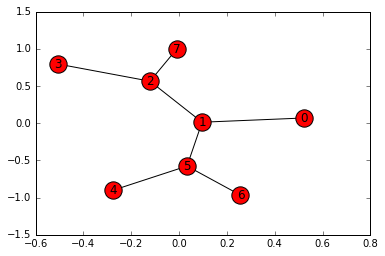

In [3]:
G=nx.Graph()
G.add_edges_from(pList)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [10]:
size = 8
R = np.matrix(np.ones(shape=(size,size)))
R*=-1
for point in pList:
    if(point[1]==goal):
        R[point] = 100
    else:
        R[point] = 0
        if(point[0]!=goal):
            R[point[::-1]]=0
        
R[goal,goal]=100
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1., 100.]])

In [11]:
Q = np.matrix(np.zeros([size,size]))
Q

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
gamma = 0.8
istate = 0

In [13]:
def available_actions(state):
    cstate = R[state,]
    av_act = np.where(cstate>=0)[1]
    return av_act

def next_action(av_action_range):
    next_action = int(np.random.choice(av_action_range,1))
    return next_action

def update(current_state,action):
    max_index = np.where(Q[action,]==np.max(Q[action,]))[1]
    if max_index.shape[0]>1:
        max_index = int(np.random.choice(max_index,size=1))
    else:
        max_index = int(max_index)
    Q[current_state,action] = R[current_state,action]+gamma*Q[action,max_index]
    
    if(np.max(Q)>0):
        return (np.sum(Q/np.max(Q)*100))
    else:
        return 0
#av_act = available_actions(istate)
#action = next_action(av_act)
#update(1,action)



In [14]:
# Training
scores = []
for epoch in range(700):
    current_state = np.random.randint(0,int(Q.shape[0]))
    av_actions = available_actions(current_state)
    n_action = next_action(av_actions)
    score = (update(current_state,n_action))
    scores.append(score)

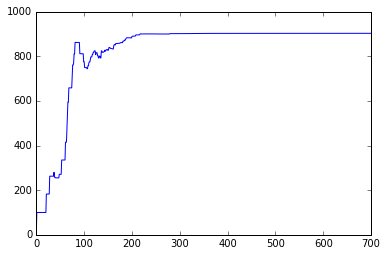

In [25]:
plt.plot(scores)
plt.show()

In [24]:
cState = 6
while(not (cState==7)):
    max_index = np.where(Q[cState,]==np.max(Q[cState,]))[1]
    print(max_index)
    cState = max_index

[5]
[1]
[2]
[7]
